In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import test_scalar
import numpy as np

## Direct

1.2339258

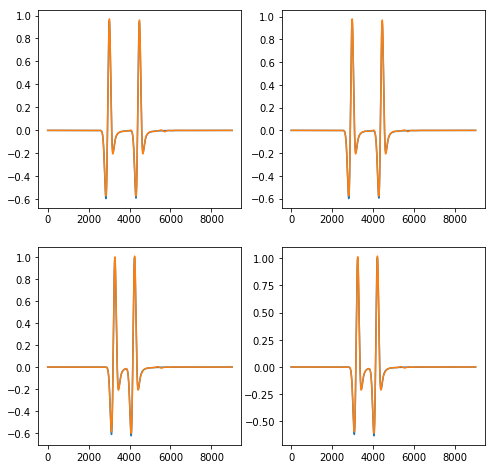

In [2]:
y = test_scalar.run_direct_2d(propagator=test_scalar.scalarprop)

fig, ax = plt.subplots(2,2, figsize=(8,8))
for shot in range(2):
    for receiver in range(2):
        ax[shot][receiver].plot(y[0][:, shot, receiver].numpy())
        ax[shot][receiver].plot(y[1][:, shot, receiver].numpy())
diff = (y[0] - y[1]).numpy().ravel()
np.linalg.norm(diff)

## Scatter

0.049274456

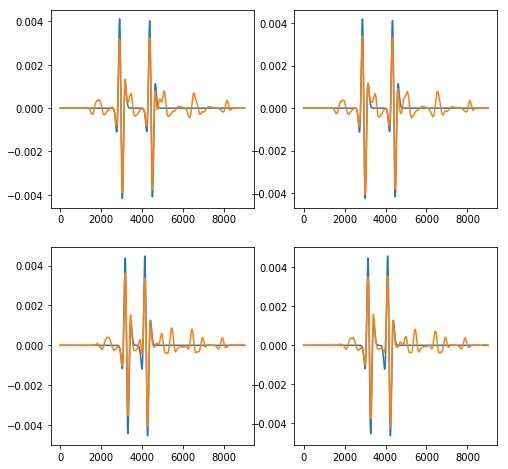

In [3]:
y = test_scalar.run_scatter_2d(propagator=test_scalar.scalarprop,
                               prop_kwargs={'pml_width': 30})

fig, ax = plt.subplots(2,2, figsize=(8,8))
for shot in range(2):
    for receiver in range(2):
        ax[shot][receiver].plot(y[0][:, shot, receiver].numpy())
        ax[shot][receiver].plot(y[1][:, shot, receiver].numpy())
diff = (y[0] - y[1]).numpy().ravel()
np.linalg.norm(diff)

## Grad

6.704974e-08

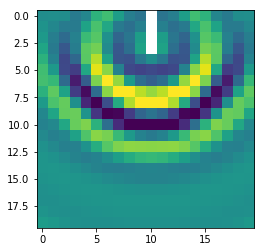

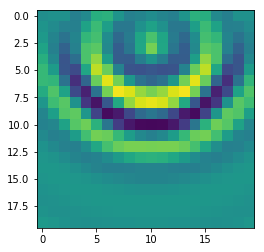

In [4]:
y = test_scalar.run_model_grad_2d(propagator=test_scalar.scalarprop,
                                  prop_kwargs={'pml_width': 30})

vmin, vmax = np.nanpercentile(y[0].numpy(), [2,98])
plt.imshow(y[0][0].numpy(), vmin=vmin, vmax=vmax)
plt.figure()
plt.imshow(y[1][0].numpy(), vmin=vmin, vmax=vmax)
diff = (y[0]-y[1]).numpy().ravel()
np.linalg.norm(diff[np.where(~np.isnan(diff))])

## Source grad

38.68457
5.1189516e-05


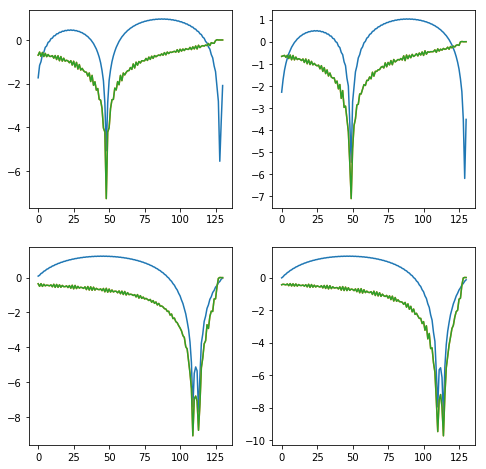

In [5]:
y = test_scalar.run_source_grad_2d(propagator=test_scalar.scalarprop,
                                   dt=0.004, nx=(10, 10),
                                   calc_true_grad=True)

fig, ax = plt.subplots(2, 2, figsize=(8,8))
for shot in range(2):
    for receiver in range(2):
        ax[shot][receiver].plot(y[0][:, shot, receiver].numpy())
        ax[shot][receiver].plot(y[1][:, shot, receiver].numpy())
        ax[shot][receiver].plot(y[2][:, shot, receiver].numpy())
diff = (y[0] - y[1]).numpy().ravel()
print(np.linalg.norm(diff))
diff = (y[2] - y[1]).numpy().ravel()
print(np.linalg.norm(diff))